In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.cluster.hierarchy import dendrogram , linkage
import importlib
import review_package
importlib.reload(review_package)

<module 'review_package' from '/Users/papaya/Desktop/Data-Mining/lecuture1/review_package.py'>

In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x , y))
print(data)

D = review_package.distance_matrix(data)
#
print(D)


[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]
[[0.0, 2.23606797749979, 6.708203932499369, 4.0, 5.0990195135927845, 8.06225774829855, 10.44030650891055, 2.23606797749979, 6.0, 8.0], [2.23606797749979, 0.0, 7.0710678118654755, 2.23606797749979, 3.605551275463989, 8.48528137423857, 10.295630140987, 3.1622776601683795, 5.385164807134504, 7.280109889280518], [6.708203932499369, 7.0710678118654755, 0.0, 9.219544457292887, 10.63014581273465, 1.4142135623730951, 4.0, 4.47213595499958, 3.0, 3.605551275463989], [4.0, 2.23606797749979, 9.219544457292887, 0.0, 1.4142135623730951, 10.63014581273465, 12.206555615733702, 5.385164807134504, 7.211102550927978, 8.94427190999916], [5.0990195135927845, 3.605551275463989, 10.63014581273465, 1.4142135623730951, 0.0, 12.041594578792296, 13.601470508735444, 6.708203932499369, 8.602325267042627, 10.295630140987], [8.06225774829855, 8.48528137423857, 1.4142135623730951, 10.63014581273465, 12.041594578792296, 0.0

In [28]:
n = D.shape[0]
iu, ju = np.triu_indices(n, k=1) # 這一行會回傳我需要看有哪一些是我需要的位置
vals = D[iu, ju]
print(vals)
# k = np.argmin(vals)

[ 2.23606798  6.70820393  4.          5.09901951  8.06225775 10.44030651
  2.23606798  6.          8.          7.07106781  2.23606798  3.60555128
  8.48528137 10.29563014  3.16227766  5.38516481  7.28010989  9.21954446
 10.63014581  1.41421356  4.          4.47213595  3.          3.60555128
  1.41421356 10.63014581 12.20655562  5.38516481  7.21110255  8.94427191
 12.04159458 13.60147051  6.70820393  8.60232527 10.29563014  3.16227766
  5.83095189  4.12310563  4.12310563  8.24621125  5.          3.60555128
  4.12310563  6.08276253  2.        ]


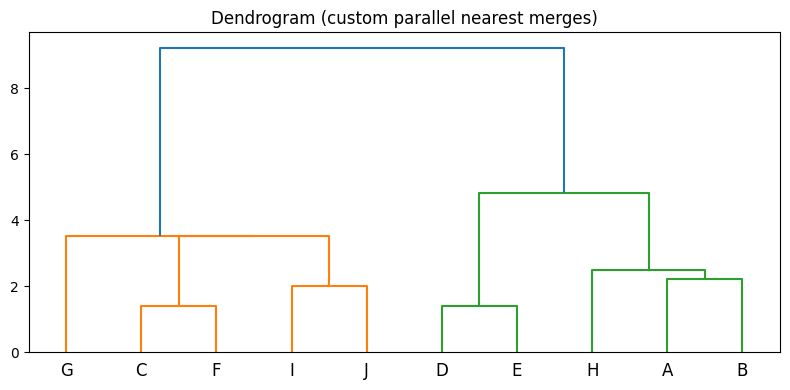

In [5]:
# 假資料 + 跑你的流程 + 畫樹
import pandas as pd
from cluster import fit_custom_hclust, levels_to_linkage, plot_dendrogram, cut_tree_k

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
labels = list("ABCDEFGHIJ")
df = pd.DataFrame({"x": x, "y": y}, index=labels)

final_df, levels, mins = fit_custom_hclust(df)
Z = levels_to_linkage(levels, mins, init_labels=labels)

plot_dendrogram(Z, labels=labels)   # 這個函式內已經 plt.show()，會直接顯示


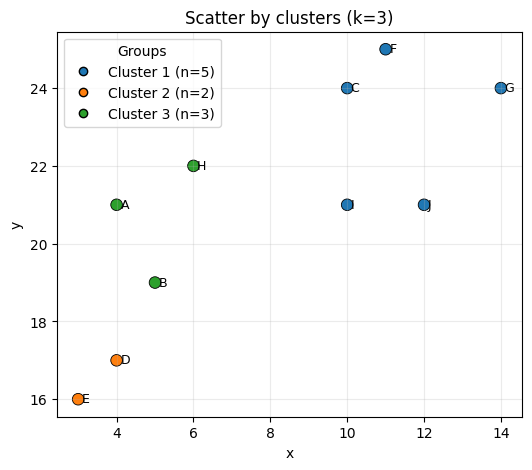

In [6]:
# 假設你已有 df（index 為點名，欄位含 x,y 或其他數值特徵）
# 並且已經 from cluster import fit_custom_hclust, levels_to_linkage, cut_tree_k
import numpy as np
import matplotlib.pyplot as plt

# 跑自訂 H-Clust
final_df, levels, mins = fit_custom_hclust(df)
Z = levels_to_linkage(levels, mins, init_labels=list(df.index))

# 依 k 切樹拿群編號（1..k）
k = 3
assign = cut_tree_k(Z, labels=list(df.index), k=k)

# --- 畫散佈圖（假設 df 有 'x','y' 兩維）---
fig, ax = plt.subplots(figsize=(6, 5))
labels = df.index.to_list()
clusters = assign.loc[labels].to_numpy()  # 與 df.index 對齊

# 用 tab10 調色盤（會自動循環）
cmap = plt.get_cmap("tab10")
colors = [cmap((c-1) % 10) for c in clusters]

ax.scatter(df["x"], df["y"], s=70, edgecolors="black", linewidths=0.6, c=colors)

# 顯示點名（可關掉）
for name, (xx, yy) in zip(labels, df[["x","y"]].to_numpy()):
    ax.text(xx, yy, f" {name}", va="center", fontsize=9)

# 做個群組圖例（每群顯示筆數）
handles = []
for cid in sorted(np.unique(clusters)):
    handles.append(plt.Line2D([0],[0], marker='o', linestyle='',
                              markeredgecolor='black', markerfacecolor=cmap((cid-1)%10),
                              label=f"Cluster {cid} (n={(clusters==cid).sum()})"))
ax.legend(handles=handles, title="Groups", loc="best", frameon=True)

ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title(f"Scatter by clusters (k={k})")
ax.grid(True, alpha=0.25)
plt.show()


### use package

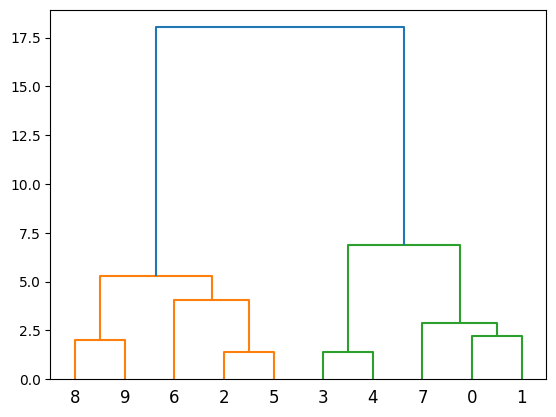

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

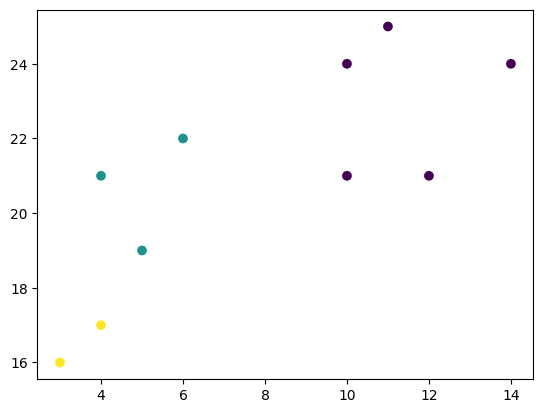

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3 , linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
plt.scatter(x, y , c = labels)
plt.show()


In [1]:
# Complete, self-contained Python code to estimate four CFA-style models on the given 6x6 correlation
# matrix, compute common fit indices, and output tidy tables (and CSV files).
#
# - Model (a): One-factor (errors uncorrelated)
# - Model (b): Two-factor, uncorrelated factors
# - Model (c): Two-factor, correlated factors
# - Model (d): One-factor + equal error covariances (all residuals share the same off-diagonal value)
#
# Notes:
# * Uses ML discrepancy function F_ml = log|Σ| + tr(S Σ^{-1}) - log|S| - p
# * GFI/AGFI are computed in the common ULS-style form (1 - sum(resid^2)/sum(S^2))
# * NFI uses independence (Σ = I) as the null model since S is a correlation matrix.
# * Reliability: SMC = 1 - θ_i  (standardized), Construct Reliability = (Σλ)^2 / [(Σλ)^2 + Σθ]
#
# The script prints nicely rounded tables and also writes CSVs to /mnt/data.
#
# You can copy-paste this whole cell as a standalone script.

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import chi2
from typing import Dict, Tuple
import caas_jupyter_tools as cj

# -------------------------
# 1) Input: correlation matrix & sample size
# -------------------------
p = 6
S = np.array([
    [1.00, 0.90, 0.90, 0.70, 0.70, 0.70],
    [0.90, 1.00, 0.90, 0.70, 0.70, 0.70],
    [0.90, 0.90, 1.00, 0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70, 1.00, 0.90, 0.90],
    [0.70, 0.70, 0.70, 0.90, 1.00, 0.90],
    [0.70, 0.70, 0.70, 0.90, 0.90, 1.00],
], dtype=float)
n = 200

# -------------------------
# 2) Utility functions
# -------------------------
def softplus(z: np.ndarray) -> np.ndarray:
    """Softplus for positive variances (stable)."""
    return np.log1p(np.exp(-np.abs(z))) + np.maximum(z, 0.0)

def is_pos_def(A: np.ndarray) -> bool:
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False

def F_ml(S: np.ndarray, Sigma: np.ndarray) -> float:
    """ML discrepancy function for covariance structures."""
    invSig = np.linalg.inv(Sigma)
    val = np.log(np.linalg.det(Sigma)) + np.trace(S @ invSig) - np.log(np.linalg.det(S)) - S.shape[0]
    return float(val)

def offdiag(M: np.ndarray) -> np.ndarray:
    return M[~np.eye(M.shape[0], dtype=bool)]

def fit_indices(S: np.ndarray, Sigma: np.ndarray, df: int, n: int) -> Dict[str, float]:
    """Compute a set of fit indices given S, model-implied Sigma, df, and n."""
    F = F_ml(S, Sigma)
    chi2_val = (n - 1) * F
    pval = 1 - chi2.cdf(chi2_val, df)

    resid = S - Sigma
    r_off = offdiag(resid)
    RMSR = float(np.sqrt(np.mean(r_off**2)))

    # ULS-style GFI/AGFI
    num = float(np.sum(resid**2))
    den = float(np.sum(S**2))
    GFI = 1 - num / den
    AGFI = 1 - ((p * (p + 1) / 2) / df) * (1 - GFI) if df > 0 else np.nan

    # NFI vs independence model (Σ = I on correlations)
    Sigma0 = np.eye(p)
    chi2_null = (n - 1) * F_ml(S, Sigma0)
    NFI = (chi2_null - chi2_val) / chi2_null

    MDN = float(np.median(np.abs(r_off)))
    return dict(chi2=chi2_val, df=df, p_value=pval, RMSR=RMSR, GFI=GFI, AGFI=AGFI, NFI=NFI, MDN=MDN)

# -------------------------
# 3) Model-implied Sigma builders
# -------------------------
def sigma_one_factor(params: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    lamb = params[:6]
    thetas = softplus(params[6:12]) + 1e-6
    Sigma = np.outer(lamb, lamb) + np.diag(thetas)  # Var(f)=1
    return Sigma, lamb, thetas

def sigma_two_factor_uncorr(params: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, float]:
    lamb = params[:6]
    thetas = softplus(params[6:12]) + 1e-6
    Lambda = np.zeros((6, 2))
    Lambda[0:3, 0] = lamb[0:3]
    Lambda[3:6, 1] = lamb[3:6]
    Phi = np.eye(2)  # uncorrelated
    Sigma = Lambda @ Phi @ Lambda.T + np.diag(thetas)
    return Sigma, Lambda, thetas, 0.0

def sigma_two_factor_corr(params: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, float]:
    lamb = params[:6]
    thetas = softplus(params[6:12]) + 1e-6
    z = params[12]
    r = float(np.tanh(z))  # factor correlation
    Lambda = np.zeros((6, 2))
    Lambda[0:3, 0] = lamb[0:3]
    Lambda[3:6, 1] = lamb[3:6]
    Phi = np.array([[1, r], [r, 1]])
    Sigma = Lambda @ Phi @ Lambda.T + np.diag(thetas)
    return Sigma, Lambda, thetas, r

def sigma_one_factor_eq_errcov(params: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, float]:
    lamb = params[:6]
    thetas = softplus(params[6:12]) + 1e-6
    psi = float(np.tanh(params[12]) * 0.4)  # keep in (-0.4, 0.4) for stability
    Theta = np.diag(thetas) + psi * (np.ones((p, p)) - np.eye(p))
    Sigma = np.outer(lamb, lamb) + Theta
    return Sigma, lamb, thetas, psi

# -------------------------
# 4) Optimization helper
# -------------------------
def fit_model(build_fn, q: int, start: np.ndarray):
    def objective(par):
        try:
            Sigma, *_ = build_fn(par)
            if not is_pos_def(Sigma):
                return 1e6
            return F_ml(S, Sigma)
        except Exception:
            return 1e6
    res = minimize(objective, start, method="BFGS", options=dict(maxiter=5000, gtol=1e-8))
    return res

# -------------------------
# 5) Fit four models
# -------------------------
lambda_start = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95])
theta0 = np.array([0.10] * 6)
theta_start = np.log(np.exp(theta0) - 1)  # inverse softplus approx
z_start = np.arctanh(0.78)
psi_start = np.arctanh(0.10)

# (a) One-factor
q_a = 12
res_a = fit_model(sigma_one_factor, q_a, np.concatenate([lambda_start, theta_start]))
Sig_a, lamb_a, theta_a = sigma_one_factor(res_a.x)
df_a = int(p * (p + 1) / 2 - q_a)
fi_a = fit_indices(S, Sig_a, df_a, n)

# (b) Two-factor, uncorrelated
q_b = 12
res_b = fit_model(sigma_two_factor_uncorr, q_b, np.concatenate([lambda_start, theta_start]))
Sig_b, Lambda_b, theta_b, _ = sigma_two_factor_uncorr(res_b.x)
df_b = int(p * (p + 1) / 2 - q_b)
fi_b = fit_indices(S, Sig_b, df_b, n)

# (c) Two-factor, correlated
q_c = 13
res_c = fit_model(sigma_two_factor_corr, q_c, np.concatenate([lambda_start, theta_start, [z_start]]))
Sig_c, Lambda_c, theta_c, r_c = sigma_two_factor_corr(res_c.x)
df_c = int(p * (p + 1) / 2 - q_c)
fi_c = fit_indices(S, Sig_c, df_c, n)

# (d) One-factor + equal error covariances
q_d = 13
res_d = fit_model(sigma_one_factor_eq_errcov, q_d, np.concatenate([lambda_start, theta_start, [psi_start]]))
Sig_d, lamb_d, theta_d, psi_d = sigma_one_factor_eq_errcov(res_d.x)
df_d = int(p * (p + 1) / 2 - q_d)
fi_d = fit_indices(S, Sig_d, df_d, n)

# -------------------------
# 6) Build output tables
# -------------------------
tbl1 = pd.DataFrame({
    "model": ["(a) One-factor", "(b) Two-factor (uncorr)", "(c) Two-factor (corr)", "(d) One-factor + equal error cov"],
    "# of indicators": [6, 6, 6, 6],
    "# of equations": [int(p * (p + 1) / 2)] * 4,
    "# of parameters": [q_a, q_b, q_c, q_d],
    "df = p(p+1)/2 - q": [df_a, df_b, df_c, df_d],
    "Identification": ["Over"] * 4,
})

def smc_from_theta(theta: np.ndarray) -> np.ndarray:
    return 1 - theta

def cr_for_factor(loadings: np.ndarray, thetas: np.ndarray, idxs: np.ndarray) -> Tuple[float, float]:
    lamb = loadings[idxs]
    theta = thetas[idxs]
    suml = np.sum(lamb)
    CR = (suml ** 2) / ((suml ** 2) + np.sum(theta))
    AVE = np.sum(lamb ** 2) / (np.sum(lamb ** 2) + np.sum(theta))
    return float(CR), float(AVE)

# SMCs
smc_a = smc_from_theta(theta_a)
smc_b = smc_from_theta(theta_b)
smc_c = smc_from_theta(theta_c)
smc_d = smc_from_theta(theta_d)

# CR
cr_a, ave_a = cr_for_factor(res_a.x[:6], theta_a, np.arange(6))
cr_b_f1, ave_b_f1 = cr_for_factor(res_b.x[:3], theta_b[:3], np.arange(3))
cr_b_f2, ave_b_f2 = cr_for_factor(res_b.x[3:6], theta_b[3:6], np.arange(3))
cr_c_f1, ave_c_f1 = cr_for_factor(res_c.x[:3], theta_c[:3], np.arange(3))
cr_c_f2, ave_c_f2 = cr_for_factor(res_c.x[3:6], theta_c[3:6], np.arange(3))
cr_d, ave_d = cr_for_factor(res_d.x[:6], theta_d, np.arange(6))

fit_tbl = pd.DataFrame({
    "index": [
        "P value (χ²)", "RMSR", "GFI", "AGFI", "NFI", "MDN",
        "Mean SMC", "Construct Reliability (F1)", "Construct Reliability (F2)"
    ],
    "One-factor": [
        fi_a["p_value"], fi_a["RMSR"], fi_a["GFI"], fi_a["AGFI"], fi_a["NFI"], fi_a["MDN"],
        float(np.mean(smc_a)), cr_a, np.nan
    ],
    "Two-factor uncorrelated": [
        fi_b["p_value"], fi_b["RMSR"], fi_b["GFI"], fi_b["AGFI"], fi_b["NFI"], fi_b["MDN"],
        float(np.mean(smc_b)), cr_b_f1, cr_b_f2
    ],
    "Two-factor correlated": [
        fi_c["p_value"], fi_c["RMSR"], fi_c["GFI"], fi_c["AGFI"], fi_c["NFI"], fi_c["MDN"],
        float(np.mean(smc_c)), cr_c_f1, cr_c_f2
    ],
    "One-factor + equal err cov": [
        fi_d["p_value"], fi_d["RMSR"], fi_d["GFI"], fi_d["AGFI"], fi_d["NFI"], fi_d["MDN"],
        float(np.mean(smc_d)), cr_d, np.nan
    ]
})

# Nicely rounded copies for display
def round_df(df: pd.DataFrame, digits: int = 4) -> pd.DataFrame:
    out = df.copy()
    for col in df.columns[1:]:  # keep 'index' as label col
        out[col] = out[col].apply(lambda x: round(float(x), digits) if pd.notna(x) else x)
    return out

rounded_tbl1 = tbl1.copy()
rounded_fit = round_df(fit_tbl, 4)

# -------------------------
# 7) Save to CSV and show tables
# -------------------------
tbl1_path = "/mnt/data/cfa_models_identification.csv"
fit_path = "/mnt/data/cfa_models_fit_indices.csv"
rounded_tbl1.to_csv(tbl1_path, index=False)
rounded_fit.to_csv(fit_path, index=False)

# Show tables in the UI
cj.display_dataframe_to_user("Model identification & df", rounded_tbl1)
cj.display_dataframe_to_user("Fit indices (approx ML; see notes)", rounded_fit)

# Print key parameters for transparency
params_summary = {
    "phi12_in_model_c": float(np.tanh(res_c.x[12])),
    "psi_in_model_d": float(np.tanh(res_d.x[12]) * 0.4),
    "loadings_a": list(np.round(res_a.x[:6], 3)),
    "loadings_c_f1": list(np.round(res_c.x[:3], 3)),
    "loadings_c_f2": list(np.round(res_c.x[3:6], 3)),
}
print("Key parameter estimates:", params_summary)
print("Saved files:")
print(" -", tbl1_path)
print(" -", fit_path)


ModuleNotFoundError: No module named 'caas_jupyter_tools'

=== 指標表（centroid linkage，z-score）===
 k     R2  RMSSTD
 1 0.0000  1.0954
 2 0.3540  0.9844
 3 0.7961  0.6386
 4 0.8700  0.6246
 5 0.9455  0.5718
 6 1.0000  0.0000

=== 各群成員（建議看 k=3） ===

k = 2
  群 1: ['Mackerel', 'Perch', 'Salmon', 'Tuna', 'Shrimp']
  群 2: ['Sardines']

k = 3
  群 1: ['Mackerel', 'Perch', 'Tuna']
  群 2: ['Salmon', 'Shrimp']
  群 3: ['Sardines']

k = 4
  群 1: ['Mackerel', 'Perch', 'Tuna']
  群 2: ['Salmon']
  群 3: ['Shrimp']
  群 4: ['Sardines']


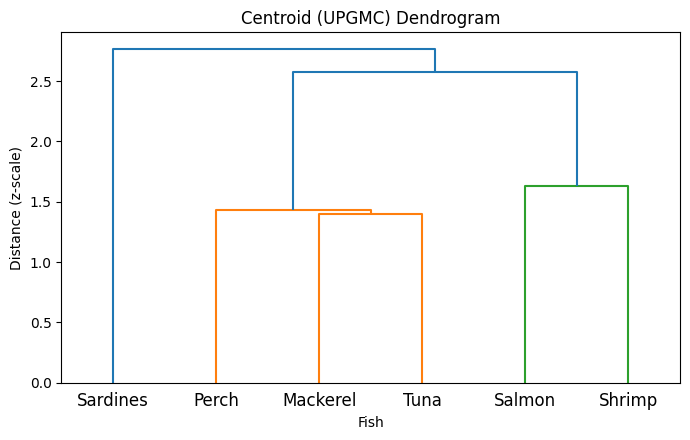


=== k=3 的群心（原始尺度） ===
群 1（['Mackerel', 'Perch', 'Tuna']）:
Energy     5.333
Fat        9.000
Calcium    7.667
dtype: float64

群 2（['Salmon', 'Shrimp']）:
Energy      3.5
Fat         3.0
Calcium    16.0
dtype: float64

群 3（['Sardines']）:
Energy      6.0
Fat         9.0
Calcium    46.0
dtype: float64



In [1]:
# -*- coding: utf-8 -*-
"""
Fish nutrients hierarchical clustering (centroid / UPGMC)
- 標準化三變數
- 以 centroid 連結做階層式分群
- 對 k = 1..6 計算 R^2 與 RMSSTD
- 輸出各群成員
"""

import numpy as np
import pandas as pd
from math import sqrt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# ---------- 1) 資料 ----------
data = pd.DataFrame({
    "Fish": ["Mackerel","Perch","Salmon","Sardines","Tuna","Shrimp"],
    "Energy":[5,6,4,6,5,3],
    "Fat":[9,11,5,9,7,1],
    "Calcium":[20,2,20,46,1,12]
}).set_index("Fish")

# ---------- 2) 標準化（z-score；避免尺度差影響距離） ----------
Z = (data - data.mean()) / data.std(ddof=0)  # ddof=0 對應母體標準差

# ---------- 3) 階層式分群（centroid / UPGMC） ----------
link = linkage(Z.values, method='centroid', metric='euclidean')

# ---------- 4) 指標計算函式 ----------
X = Z.values
n, p = X.shape
grand_mean = X.mean(axis=0)
TSS = ((X - grand_mean)**2).sum()

def wss_for_labels(labels: np.ndarray) -> float:
    """給定叢集標籤，計算總群內平方和 WSS"""
    labels = np.asarray(labels)
    wss = 0.0
    for lab in np.unique(labels):
        Xi = X[labels == lab]
        mu = Xi.mean(axis=0)
        wss += ((Xi - mu)**2).sum()
    return wss

def labels_to_names(labs: np.ndarray, index_names) -> dict:
    """把標籤轉為{群: 名稱列表}"""
    out = {}
    for lab in np.unique(labs):
        idx = np.where(labs == lab)[0]
        out[int(lab)] = [index_names[i] for i in idx]
    return out

# ---------- 5) 逐一群數計算 R^2 與 RMSSTD ----------
rows = []
memberships = {}
for k in range(1, n + 1):
    labs = fcluster(link, t=k, criterion='maxclust')
    wss = wss_for_labels(labs)
    bss = TSS - wss
    r2 = float(bss / TSS)
    # RMSSTD: pooled, 根據 (N-K)*P 的自由度
    rmsstd = float(sqrt(wss / ((n - k) * p))) if k < n else 0.0
    rows.append({"k": k, "R2": r2, "RMSSTD": rmsstd})
    memberships[k] = labels_to_names(labs, Z.index.tolist())

metrics = pd.DataFrame(rows).round(4)

print("=== 指標表（centroid linkage，z-score）===")
print(metrics.to_string(index=False))
print("\n=== 各群成員（建議看 k=3） ===")
for k in [2, 3, 4]:
    print(f"\nk = {k}")
    for g, names in memberships[k].items():
        print(f"  群 {g}: {names}")

# ---------- 6)（可選）畫樹狀圖 ----------
plt.figure(figsize=(7, 4.5))
dendrogram(link, labels=Z.index.tolist())
plt.title("Centroid (UPGMC) Dendrogram")
plt.xlabel("Fish")
plt.ylabel("Distance (z-scale)")
plt.tight_layout()
plt.show()

# ---------- 7)（可選）輸出群心供解讀：以 k=3 為例 ----------
k_best = 3
labs3 = fcluster(link, t=k_best, criterion='maxclust')
groups3 = labels_to_names(labs3, data.index.tolist())
centroids_orig = {g: data.loc[nms].mean().round(3) for g, nms in groups3.items()}
print("\n=== k=3 的群心（原始尺度） ===")
for g, c in centroids_orig.items():
    print(f"群 {g}（{groups3[g]}）:\n{c}\n")


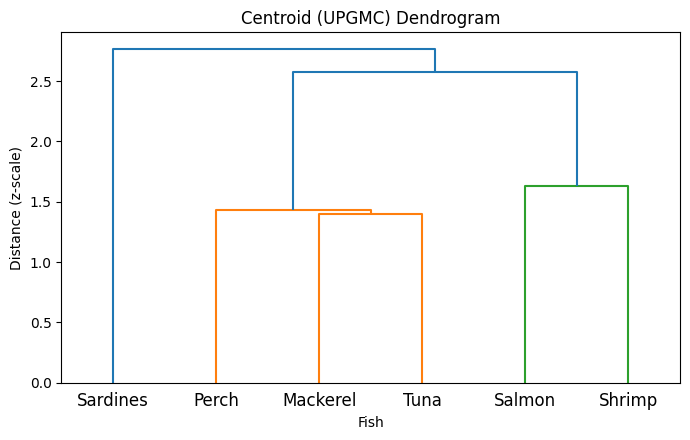

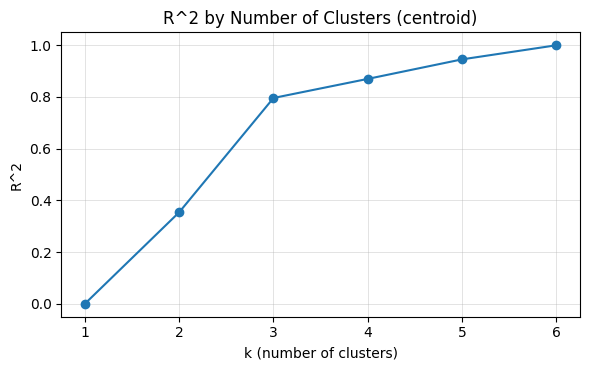

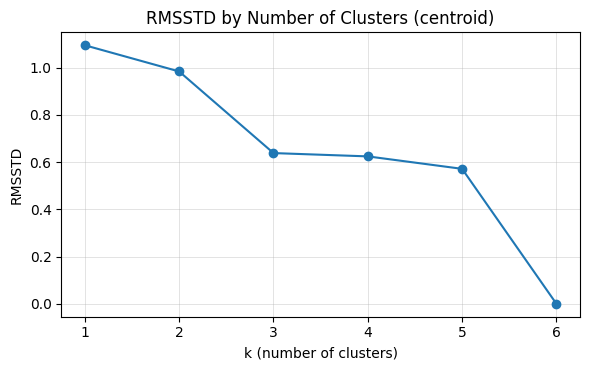

In [2]:
# Recreate the data, run centroid linkage, and draw three charts:
# 1) Dendrogram
# 2) R^2 vs k (elbow)
# 3) RMSSTD vs k (elbow)

import numpy as np
import pandas as pd
from math import sqrt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# ----- Data -----
data = pd.DataFrame({
    "Fish": ["Mackerel","Perch","Salmon","Sardines","Tuna","Shrimp"],
    "Energy":[5,6,4,6,5,3],
    "Fat":[9,11,5,9,7,1],
    "Calcium":[20,2,20,46,1,12]
}).set_index("Fish")

# Standardize
Z = (data - data.mean())/data.std(ddof=0)

# Centroid linkage
link = linkage(Z.values, method='centroid', metric='euclidean')

# Plot 1: Dendrogram
plt.figure(figsize=(7, 4.5))
dendrogram(link, labels=Z.index.tolist())
plt.title("Centroid (UPGMC) Dendrogram")
plt.xlabel("Fish")
plt.ylabel("Distance (z-scale)")
plt.tight_layout()
plt.show()

# Compute metrics k=1..6
X = Z.values
n, p = X.shape
grand_mean = X.mean(axis=0)
TSS = ((X - grand_mean)**2).sum()

def wss_for_labels(labels):
    wss = 0.0
    labels = np.array(labels)
    for lab in np.unique(labels):
        Xi = X[labels==lab]
        mu = Xi.mean(axis=0)
        wss += ((Xi - mu)**2).sum()
    return wss

k_vals, R2_vals, RMS_vals = [], [], []
for k in range(1, n+1):
    labs = fcluster(link, t=k, criterion='maxclust')
    wss = wss_for_labels(labs)
    bss = TSS - wss
    R2 = bss / TSS
    rmsstd = sqrt(wss / ( (n - k) * p)) if k < n else 0.0
    k_vals.append(k); R2_vals.append(R2); RMS_vals.append(rmsstd)

# Plot 2: R^2 vs k
plt.figure(figsize=(6, 3.8))
plt.plot(k_vals, R2_vals, marker='o')
plt.title("R^2 by Number of Clusters (centroid)")
plt.xlabel("k (number of clusters)")
plt.ylabel("R^2")
plt.xticks(k_vals)
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 3: RMSSTD vs k
plt.figure(figsize=(6, 3.8))
plt.plot(k_vals, RMS_vals, marker='o')
plt.title("RMSSTD by Number of Clusters (centroid)")
plt.xlabel("k (number of clusters)")
plt.ylabel("RMSSTD")
plt.xticks(k_vals)
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()
